In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Survey = pd.read_csv('ACME-HappinessSurvey2020.csv')
#As long as my notebook path lies within the same location as my Data file pathm I'm OK! Otherwise i need to specify CSV path.

In [6]:
Survey.info()
#7 columns in total, 126 entries for each, no null values, data seems OK!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


<Axes: xlabel='Y', ylabel='count'>

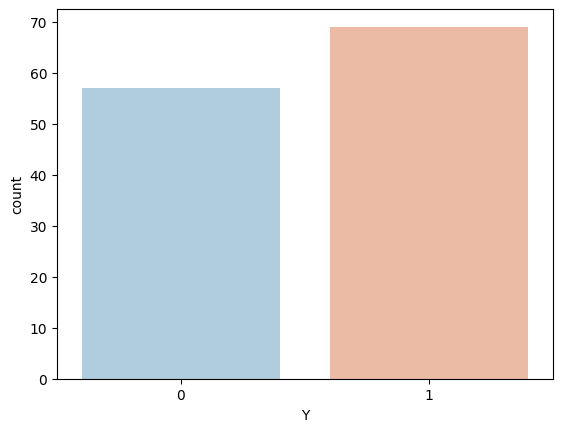

In [7]:
sns.countplot(x= Survey['Y'] , data = Survey , palette = 'RdBu_r')

<Axes: >

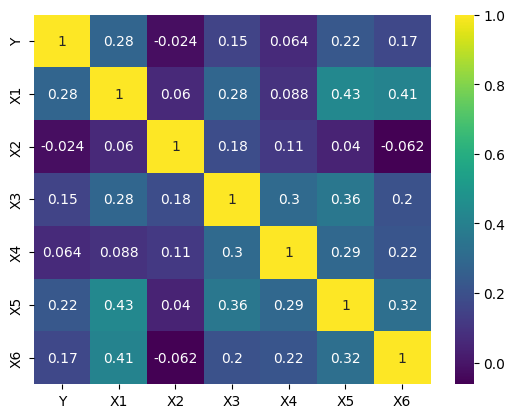

In [8]:
sns.heatmap(Survey.corr() , cmap = 'viridis', annot = True )

<Axes: >

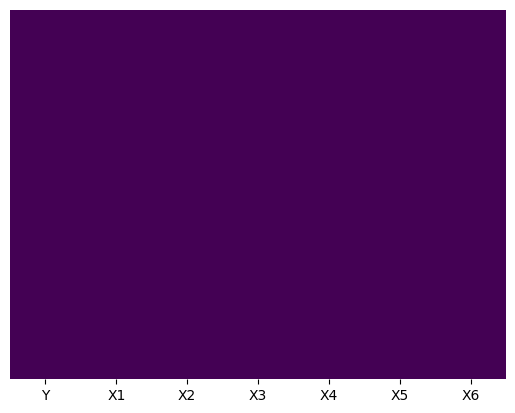

In [9]:
sns.heatmap(Survey.isnull() , yticklabels = False , cbar = False, cmap = 'viridis')
#No nall data

In [10]:
#Should all features be in numeric form?
#What are types of Logistics Regression?
#I understand that this is a "BINARY Clssification" Problem which can be solved using Supervised Learning -> Classification -> Logistics Regression
#Since Data is being classified into two categories (Happy vs Unhappy). How about Multi Classification?
#Should i be using logistics regression, or Linear Regression (Doesn't Y here depend on X1-X5?) 
#My assumption is Logistic Regression Since Y Can take only Discreat Values (0 OR 1). 
#The target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.

In [11]:
#Split Lables from Features

In [12]:
#Features
X= Survey.drop(['Y'], axis = 1)

In [13]:
#Lables
y= Survey['Y']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR = LogisticRegression()

In [18]:
#Train the model
LR.fit(X_train,y_train)

LogisticRegression()

In [19]:
print (f'Accuracy - : {LR.score(X,y):.3f}')

Accuracy - : 0.643


In [20]:
y_predict= LR.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
CR = classification_report(y_test, y_predict)
CM = confusion_matrix(y_test, y_predict)

In [23]:
print(CR)

              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.59      0.80      0.68        20

    accuracy                           0.61        38
   macro avg       0.61      0.59      0.58        38
weighted avg       0.61      0.61      0.59        38



In [24]:
print(CM)

[[ 7 11]
 [ 4 16]]


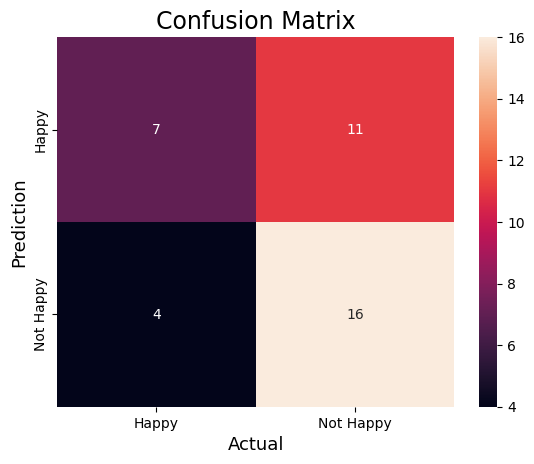

In [25]:
sns.heatmap(CM,
            annot=True,
            fmt='g',
            xticklabels=['Happy', 'Not Happy'],
            yticklabels=['Happy', 'Not Happy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [26]:
#We need to tune our training parameters so we can get at least an Accuracy score of 73%
#Or try a different algorithms?

In [ ]:
# Trying out differrent param_grid configurations.

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

seed =42

In [28]:
#param_grid = [{'penalty':['l1','l2']}, 
#              {'C':[1, 10, 100, 1000]}]

#param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

param_grid = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



In [29]:
#GridSearch Optimization

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = seed)
GS = GridSearchCV(estimator = LR, param_grid = param_grid, cv = cv, verbose=True, 
                   n_jobs=1, scoring = "accuracy", error_score = 0)
grid_results = GS.fit(X_train, y_train)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Shawahneh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed i

In [30]:
#final model
final_model = LR.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [31]:
y_pred = final_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, y_pred), confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.59      0.80      0.68        20

    accuracy                           0.61        38
   macro avg       0.61      0.59      0.58        38
weighted avg       0.61      0.61      0.59        38
 [[ 7 11]
 [ 4 16]]
{'C': 0.1}


In [34]:
#All configurations yield same results (changing cv = cv to cv =5 yields same results as well)